<a href="https://colab.research.google.com/github/aravindaloshan/Marker-Based-AR/blob/main/Copy_of_handwritten_digit_classification_using_multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Handwritten Digits Using TensorFlow 2.x to Aid People with Colorblindness

##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images.

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**

[link text](https://)
The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- How to improve the model?

# Solution: Classifying Handwritten digits using Tensorflow 2.x

In [ ]:
!pip install tensorflow

In [ ]:
#verify the installation
import tensorflow as tf
from tensorflow import keras




##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [ ]:
# Loading MNIST dataset
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

###Data Preprocessing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784.
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)

# Data is converted into float32 to use 32-bit precision # when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


## Designing the Model

###Preparing the Model 0: Single layer Perceptron


Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))

In [ ]:
# Compiling the model.
model_0.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 3s 3ms/step - loss: 1.0980 - accuracy: 0.7454 - val_loss: 0.6632 - val_accuracy: 0.8564
Epoch 2/70
750/750 [==============================] - 2s 3ms/step - loss: 0.6115 - accuracy: 0.8561 - val_loss: 0.5125 - val_accuracy: 0.8774
Epoch 3/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5142 - accuracy: 0.8714 - val_loss: 0.4528 - val_accuracy: 0.8860
Epoch 4/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4671 - accuracy: 0.8794 - val_loss: 0.4198 - val_accuracy: 0.8916
Epoch 5/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4383 - accuracy: 0.8846 - val_loss: 0.3984 - val_accuracy: 0.8957
Epoch 6/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4183 - accuracy: 0.8890 - val_loss: 0.3830 - val_accuracy: 0.8990
Epoch 7/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4033 - accuracy: 0.8919 - val_loss: 0.3715 - val_accuracy: 0.9008
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


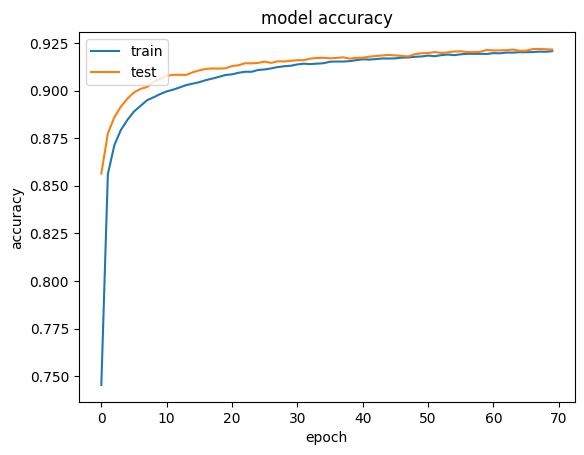

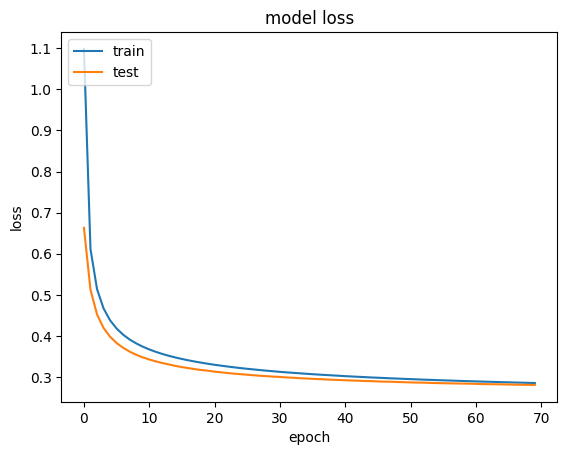

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2831 - accuracy: 0.9225
Test accuracy: 0.9225000143051147


In [ ]:
model_0.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ac17ed7f7f0>>

In [ ]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron

In [ ]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 4s 4ms/step - loss: 1.0841 - accuracy: 0.7115 - val_loss: 0.4815 - val_accuracy: 0.8745
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4278 - accuracy: 0.8826 - val_loss: 0.3503 - val_accuracy: 0.9015
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3499 - accuracy: 0.9011 - val_loss: 0.3112 - val_accuracy: 0.9104
Epoch 4/100
750/750 [==============================] - 3s 3ms/step - loss: 0.3132 - accuracy: 0.9101 - val_loss: 0.2835 - val_accuracy: 0.9193
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2898 - accuracy: 0.9160 - val_loss: 0.2662 - val_accuracy: 0.9239
Epoch 6/100
750/750 [==============================] - 5s 7ms/step - loss: 0.2709 - accuracy: 0.9224 - val_loss: 0.2521 - val_accuracy: 0.9281
Epoch 7/100
750/750 [==============================] - 5s 6ms/step - loss: 0.2566 - accuracy: 0.9262 - val_loss: 0.2408 - val_accuracy: 0.9313

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


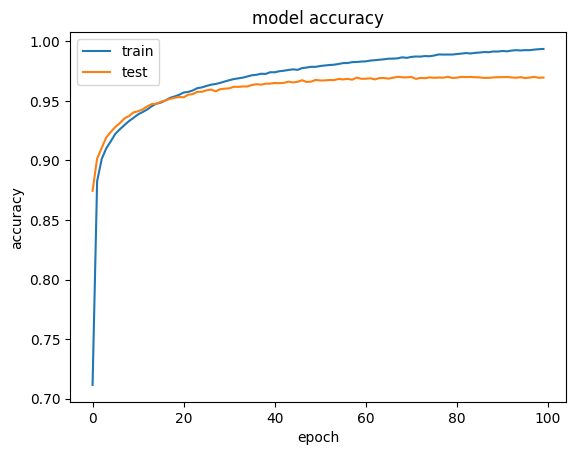

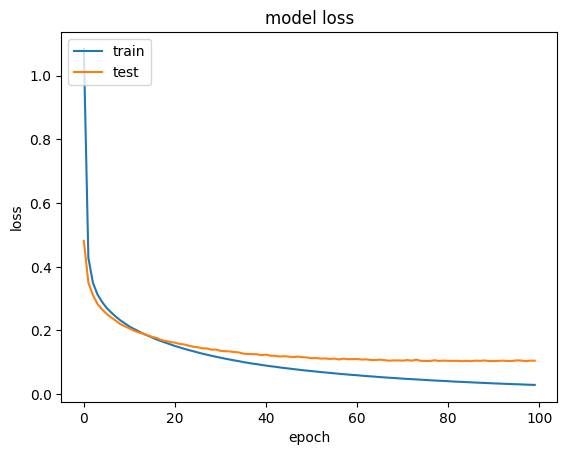

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0978 - accuracy: 0.9721
Test accuracy: 0.972100019454956


In [ ]:
model_1.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ac160473c70>>

In [ ]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.06167787,  0.04365071,  0.05508194, ..., -0.02632715,
          0.04495845, -0.04874572],
        [-0.07448498, -0.02606289, -0.0172809 , ...,  0.07556324,
          0.00590625,  0.0473484 ],
        [ 0.05627099,  0.0815976 ,  0.04187303, ..., -0.00978681,
          0.06252386, -0.07386839],
        ...,
        [ 0.01964586,  0.05323673, -0.05598441, ..., -0.06639188,
          0.08094577,  0.05908114],
        [ 0.0598383 ,  0.04348425, -0.00528584, ...,  0.00522239,
         -0.00940182, -0.03996209],
        [-0.06395282,  0.03436035,  0.03459946, ..., -0.06320979,
          0.05232497,  0.00695339]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 2.23371591e-02,  3.43248583e-02, -6.38639368e-03, -3.79240923e-02,
         6.67261034e-02, -1.04722917e-01, -1.29365064e-02,  1.28300516e-02,
        -9.32440453e-05,  5.10452762e-02,  1.89805869e-02, -4

In [ ]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [ ]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 5s 5ms/step - loss: 1.2971 - accuracy: 0.5929 - val_loss: 0.5293 - val_accuracy: 0.8708
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.6436 - accuracy: 0.8050 - val_loss: 0.3705 - val_accuracy: 0.8999
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.5095 - accuracy: 0.8479 - val_loss: 0.3142 - val_accuracy: 0.9116
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4432 - accuracy: 0.8694 - val_loss: 0.2803 - val_accuracy: 0.9178
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4026 - accuracy: 0.8805 - val_loss: 0.2596 - val_accuracy: 0.9237
Epoch 6/50
750/750 [==============================] - 3s 5ms/step - loss: 0.3688 - accuracy: 0.8917 - val_loss: 0.2382 - val_accuracy: 0.9316
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3427 - accuracy: 0.9000 - val_loss: 0.2235 - val_accuracy: 0.9336
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


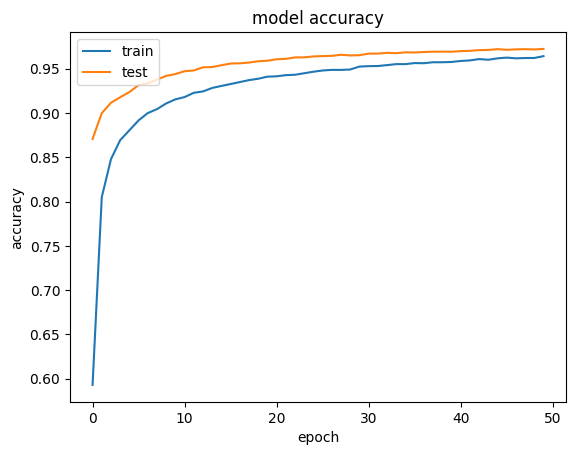

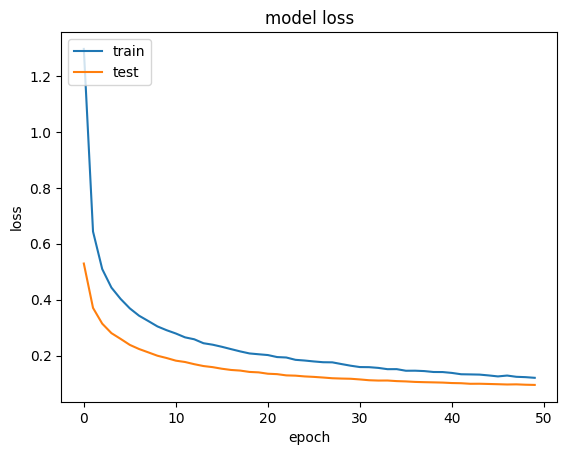

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9730
Test accuracy: 0.9729999899864197


In [ ]:
model_2.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ac160272fe0>>

In [ ]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.06499767,  0.00346889,  0.01131542, ..., -0.05465895,
          0.00203766,  0.0165578 ],
        [-0.00796883, -0.00629462,  0.04701046, ..., -0.00798097,
          0.03966574, -0.04197552],
        [-0.02581299, -0.01712581,  0.0767285 , ..., -0.03184078,
          0.06741334,  0.0796958 ],
        ...,
        [-0.01109084,  0.05652644,  0.0114615 , ...,  0.01652129,
         -0.01235721, -0.07985869],
        [-0.03135376,  0.02680197, -0.05983604, ...,  0.0302868 ,
          0.01067366, -0.03664952],
        [-0.06768209, -0.00930677,  0.06836512, ...,  0.00402884,
         -0.05359084,  0.07993823]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 3.74600105e-02,  6.83690771e-04, -4.47142348e-02,  1.58035725e-01,
        -8.00653100e-02, -1.69300437e-02,  8.73876736e-04, -7.31806085e-02,
         3.11856978e-02, -1.99255601e-01,  7.85488263e-02, 

In [ ]:
model_2.get_config()

{'name': 'sequential_2',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

###Improved Model 3: Changing the Optimizer - Adam

In [ ]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.7290 - accuracy: 0.7718 - val_loss: 0.2436 - val_accuracy: 0.9298
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3452 - accuracy: 0.8984 - val_loss: 0.1855 - val_accuracy: 0.9467
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2781 - accuracy: 0.9184 - val_loss: 0.1610 - val_accuracy: 0.9531
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2367 - accuracy: 0.9297 - val_loss: 0.1413 - val_accuracy: 0.9597
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2175 - accuracy: 0.9357 - val_loss: 0.1353 - val_accuracy: 0.9607
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1980 - accuracy: 0.9406 - val_loss: 0.1266 - val_accuracy: 0.9636
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1845 - accuracy: 0.9449 - val_loss: 0.1189 - val_accuracy: 0.9667
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


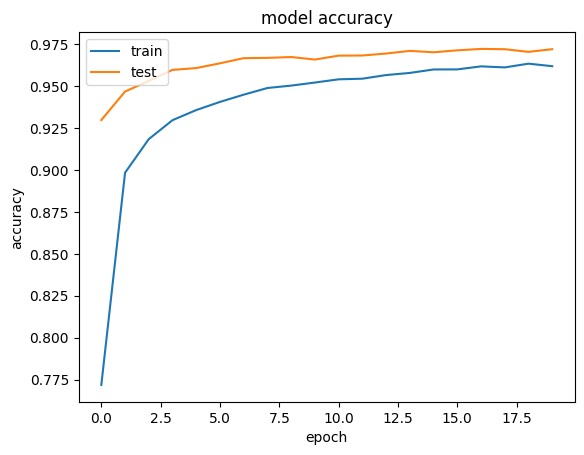

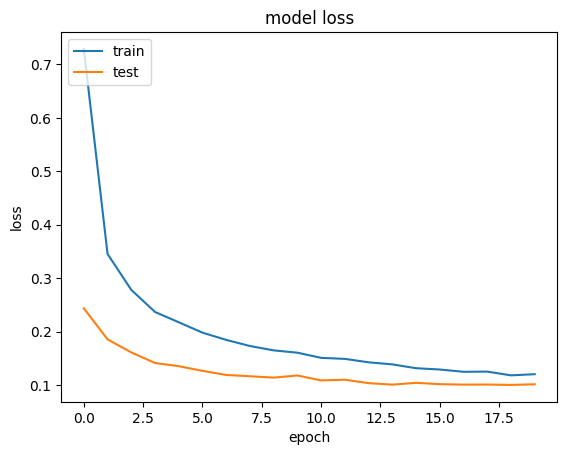

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0984 - accuracy: 0.9724
Test accuracy: 0.9724000096321106


In [ ]:
model_3.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ac16e5dfa90>>

In [ ]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.05992588,  0.01768555,  0.07035608, ...,  0.03088542,
          0.03837136, -0.00174954],
        [ 0.05313035,  0.04813219, -0.07140465, ...,  0.06283889,
          0.00816996,  0.02105282],
        [ 0.08191002,  0.02260524,  0.00737155, ...,  0.01650219,
         -0.02242148, -0.06959675],
        ...,
        [-0.07092989, -0.00562833,  0.06500309, ...,  0.03640804,
         -0.06237186,  0.04357844],
        [ 0.07382133,  0.03297146, -0.07013081, ...,  0.0262097 ,
         -0.07325207,  0.04423442],
        [-0.01305662,  0.05793213,  0.04805278, ...,  0.02163675,
          0.03615332, -0.03089779]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.08389325, -0.12484069,  0.05561002,  0.03768408,  0.06389303,
         0.01444288,  0.16490212,  0.1767407 ,  0.02772364,  0.22117054,
         0.10456594, -0.15973048, -0.03462981,  0.08666939,  0.1713

In [ ]:
model_3.get_config()

{'name': 'sequential_6',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build

###Improved Model 4: Increasing the number of Hidden Layer neuron

In [ ]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [ ]:
# Compiling the model.
model_4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2)


Epoch 1/31
375/375 [==============================] - 3s 4ms/step - loss: 0.3075 - accuracy: 0.9063 - val_loss: 0.1238 - val_accuracy: 0.9634
Epoch 2/31
375/375 [==============================] - 2s 4ms/step - loss: 0.1284 - accuracy: 0.9612 - val_loss: 0.1078 - val_accuracy: 0.9679
Epoch 3/31
375/375 [==============================] - 1s 4ms/step - loss: 0.0933 - accuracy: 0.9711 - val_loss: 0.0861 - val_accuracy: 0.9736
Epoch 4/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0725 - accuracy: 0.9768 - val_loss: 0.0723 - val_accuracy: 0.9772
Epoch 5/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0593 - accuracy: 0.9809 - val_loss: 0.0831 - val_accuracy: 0.9764
Epoch 6/31
375/375 [==============================] - 1s 4ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0761 - val_accuracy: 0.9776
Epoch 7/31
375/375 [==============================] - 2s 4ms/step - loss: 0.0476 - accuracy: 0.9837 - val_loss: 0.0813 - val_accuracy: 0.9770
Epoch 

In [ ]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9847
Test accuracy: 0.9847000241279602


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


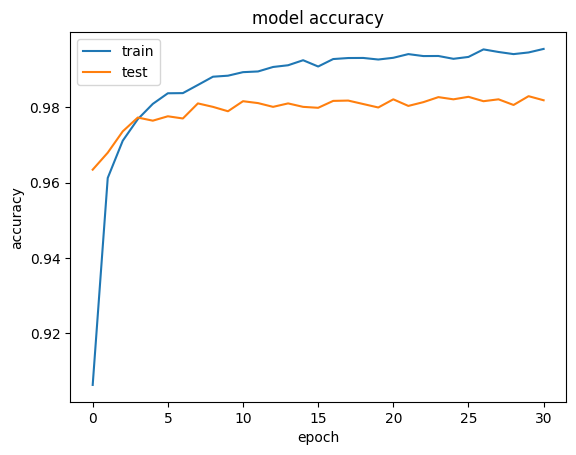

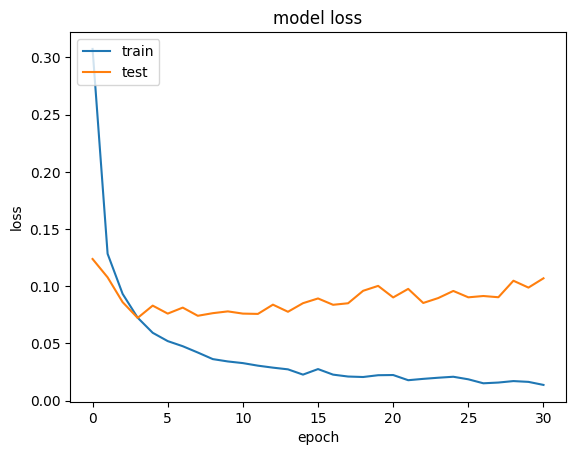

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ac0eddff040>>

In [ ]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.01312815, -0.05324848,  0.05444656, ..., -0.02854165,
         -0.00420012,  0.03564975],
        [ 0.01359577, -0.06385338,  0.03987698, ..., -0.01404507,
         -0.05012628,  0.00428004],
        [ 0.05154373, -0.0428682 ,  0.06354554, ...,  0.05194964,
         -0.05207001,  0.04176259],
        ...,
        [ 0.0349424 , -0.02083656,  0.02097262, ..., -0.00224165,
         -0.03387425, -0.03373523],
        [-0.04367797, -0.02195035, -0.00989749, ...,  0.02762564,
          0.01779098,  0.0088162 ],
        [-0.03572214, -0.02681395,  0.00175211, ..., -0.01314246,
          0.00357293,  0.02666265]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-1.46281257e-01, -8.74988586e-02,  1.08470663e-01, -1.64709821e-01,
        -1.59770727e-01, -5.96577488e-02, -1.17877029e-01, -8.12497884e-02,
        -3.98229882e-02, -8.38483945e-02, -5.67024164e-02, 

In [ ]:
model_4.get_config()

{'name': 'sequential_7',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

###Improved Model 5: Manipulating the batch size

In [ ]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)


Epoch 1/30
750/750 [==============================] - 4s 4ms/step - loss: 0.2713 - accuracy: 0.9179 - val_loss: 0.1178 - val_accuracy: 0.9634
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 0.1240 - accuracy: 0.9617 - val_loss: 0.0955 - val_accuracy: 0.9717
Epoch 3/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0932 - accuracy: 0.9709 - val_loss: 0.0984 - val_accuracy: 0.9707
Epoch 4/30
750/750 [==============================] - 3s 5ms/step - loss: 0.0783 - accuracy: 0.9751 - val_loss: 0.0825 - val_accuracy: 0.9740
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0618 - accuracy: 0.9800 - val_loss: 0.0904 - val_accuracy: 0.9743
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0779 - val_accuracy: 0.9783
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0508 - accuracy: 0.9838 - val_loss: 0.0758 - val_accuracy: 0.9784
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


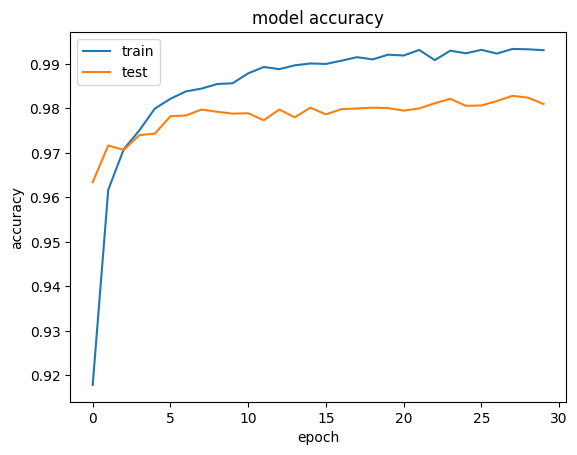

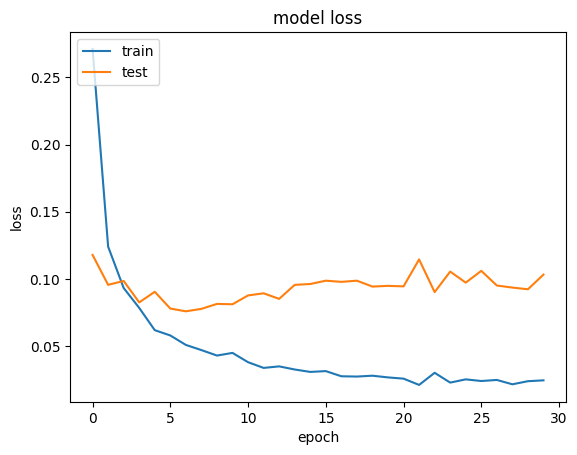

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9828
Test accuracy: 0.9828000068664551


In [ ]:
model_5.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ac0ed672320>>

In [ ]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02824032, -0.00415722,  0.00199153, ..., -0.02555685,
          0.02865962,  0.05278984],
        [ 0.05911167, -0.0586639 , -0.02790757, ..., -0.06616279,
          0.0164424 ,  0.02561416],
        [-0.05189683, -0.04407046,  0.02246545, ...,  0.05507186,
         -0.02776445, -0.054664  ],
        ...,
        [ 0.0250733 ,  0.01004701, -0.06684752, ..., -0.03350768,
          0.02740414, -0.05367739],
        [-0.01501354, -0.05974288,  0.02219361, ...,  0.06175454,
          0.05289466,  0.05324858],
        [ 0.0569828 , -0.05425824,  0.01530947, ...,  0.04567352,
          0.06282078, -0.00078364]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-1.28862903e-01,  2.44109090e-02,  1.44167701e-02, -7.57544190e-02,
         1.52470917e-02, -2.88206264e-02, -3.16995159e-02, -1.29594386e-01,
        -1.83141846e-02, -7.13039264e-02, -1.44344971e-01, 

In [ ]:
model_5.get_config()

{'name': 'sequential_8',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil

###Improved Model 6: Adding Another Hidden Layer to the Model

In [ ]:
import tensorflow as tf

#In Keras, layers are assembled to build models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model.
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 4ms/step - loss: 0.2944 - accuracy: 0.9088 - val_loss: 0.1212 - val_accuracy: 0.9639
Epoch 2/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1386 - accuracy: 0.9586 - val_loss: 0.1120 - val_accuracy: 0.9675
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1085 - accuracy: 0.9671 - val_loss: 0.1128 - val_accuracy: 0.9688
Epoch 4/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0940 - accuracy: 0.9718 - val_loss: 0.0872 - val_accuracy: 0.9752
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0800 - accuracy: 0.9759 - val_loss: 0.0964 - val_accuracy: 0.9744
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0739 - accuracy: 0.9780 - val_loss: 0.0828 - val_accuracy: 0.9787
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0670 - accuracy: 0.9799 - val_loss: 0.0947 - val_accuracy: 0.9752
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


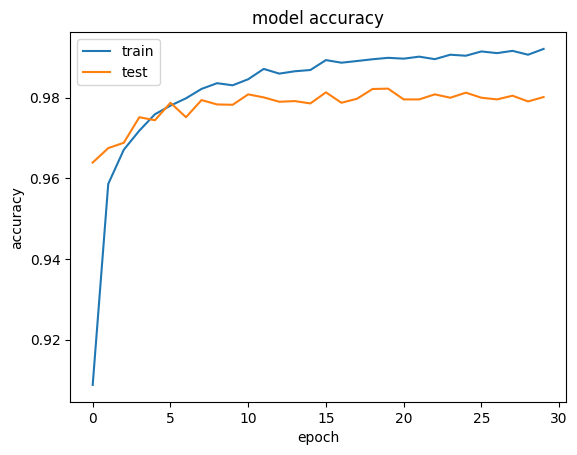

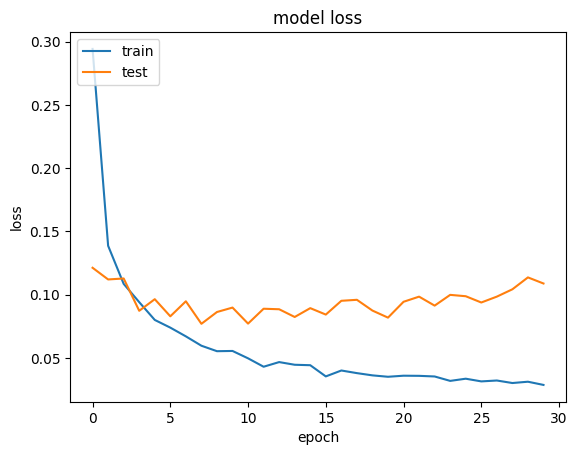

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9816
Test accuracy: 0.9815999865531921


In [ ]:
model_6.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7ac0eddbb670>>

In [ ]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02892484, -0.02731055,  0.05845809, ...,  0.02395821,
         -0.03717511,  0.02980555],
        [-0.06468692,  0.06016228,  0.05874619, ...,  0.02812001,
          0.02214445, -0.06587631],
        [ 0.03094067,  0.06251521, -0.0043781 , ..., -0.02843223,
          0.03892353, -0.04466027],
        ...,
        [-0.02013123,  0.04521327, -0.03177703, ...,  0.02753115,
         -0.00697072,  0.03071633],
        [-0.01782748,  0.06010857, -0.06540707, ...,  0.06220861,
         -0.02645291,  0.00731517],
        [-0.0242966 ,  0.02181081, -0.01819584, ...,  0.04864657,
         -0.04277601, -0.02350812]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 0.1209154 , -0.11197702, -0.06279187, -0.16142608,  0.16894947,
        -0.00856942, -0.04605017, -0.03799658, -0.05108138, -0.10092271,
        -0.06965788,  0.05590715, -0.17874637, -0.26528415, -0.03

In [ ]:
model_6.get_config()

{'name': 'sequential_9',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'buil